##  Task No1. 
Extend the regression model to include multiple predictor variables and fit a multiple linear regression model.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv('train.csv')
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Predictor variables
X = df[['Sex', 'Age', 'Fare']]  
y = df['Survived']  # Target variable

# Encode categorical variable
le = LabelEncoder()
X['Sex'] = le.fit_transform(X['Sex'])

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)



C:\Users\Sikandar\AppData\Local\Temp\ipykernel_8940\2929354505.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = le.fit_transform(X['Sex'])


LinearRegression()

## Task no2. 
Evaluate the multiple linear regression model using R-squared and Mean Squared Error 
(MSE).

In [8]:
from sklearn.metrics import mean_squared_error, r2_score

# Predictions
y_pred = model.predict(X_test)

# Metrics
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r_squared}")
print(f"Mean Squared Error: {mse}")


R-squared: 0.3344247955399322
Mean Squared Error: 0.16140318150665478


## Task no3. 
Verify the assumptions of linear regression, such as linearity, homoscedasticity, and 
normality of residuals.

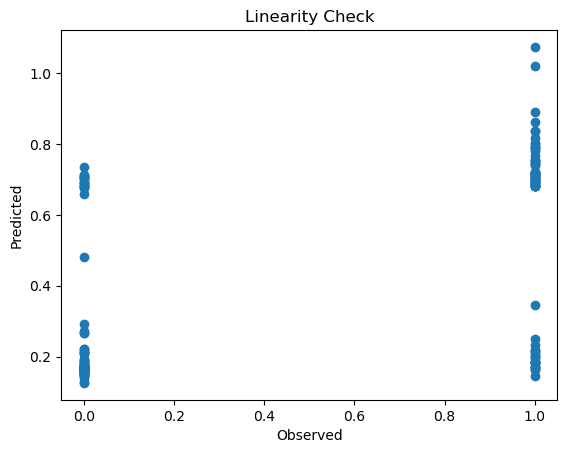

In [ ]:
# Linearity: Check if the relationship between predictors and response is linear
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.title("Linearity Check")
plt.show()


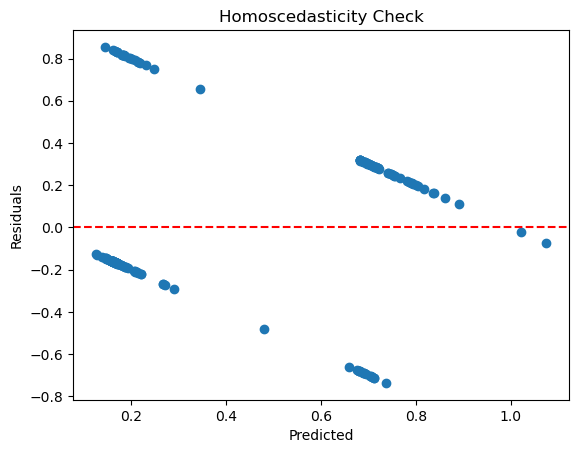

In [ ]:
# Homoscedasticity: Verify constant variance of residuals
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Homoscedasticity Check")
plt.show()


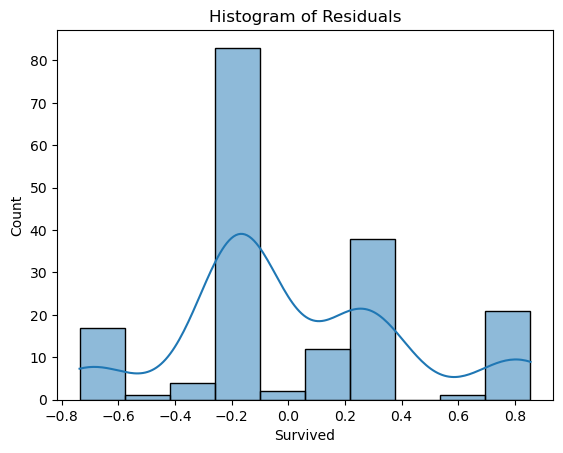

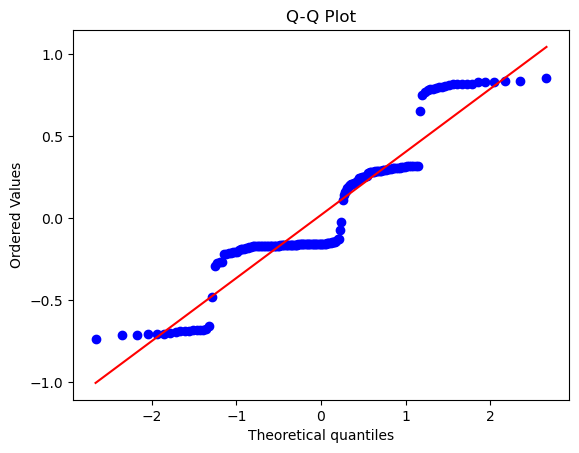

In [11]:
# Normality of Residuals: Plot a histogram or Q-Q plot.
import scipy.stats as stats
import seaborn as sns

# Histogram
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")
plt.show()

# Q-Q Plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()


## Task no4. 
Use the trained regression model to make predictions for new data points.

In [14]:
# Example new data (replace with your actual DataFrame)
new_data = pd.DataFrame({
    'Sex': ['male', 'female', 'male'],  # Example values
    'Age': [30, 25, 40],
    'Fare': [50.0, 100.0, 70.0]
})

# Encode categorical column 'Sex'
new_data['Sex'] = le.transform(new_data['Sex'])  # Ensure the same LabelEncoder is used

# Handle missing values if needed
new_data = pd.DataFrame(imputer.transform(new_data), columns=new_data.columns)  # Impute missing values

# Make predictions
new_predictions = model.predict(new_data)
print("Predictions for new data:\n", new_predictions)


Predictions for new data:
 [0.22244497 0.82443301 0.24284673]
